Good ressources:

https://github.com/openai/openai-cookbook/blob/main/examples/Fine-tuned_classification.ipynb

https://github.com/openai/openai-cookbook/blob/main/examples/How_to_finetune_chat_models.ipynb

OpenAI-Documentation

In [85]:
%pip install python-dotenv
%pip install openai
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.7/161.7 kB 2.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 10.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 263.3/263.3 kB 5.2 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 8.0 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 8.5 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 3.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [102]:
import openai
import os
from dotenv import load_dotenv
import pandas as pd
import requests
import base64
import matplotlib.pyplot as plt
from io import StringIO

In [3]:
load_dotenv()
openai.api_key=os.getenv("OPENAI_API_KEY")
#client = openai.OpenAI(api_key=os.environ.get("OPENAI_API_KEY", APIKEY))
client = openai.OpenAI(api_key=openai.api_key)

# Upload files for 70-30 w/ Valdiation job

In [8]:
#Upload dataset
with open("70-30/train_data.jsonl", "rb") as training_fd:
    training_response = client.files.create(
        file=training_fd, purpose="fine-tune"
    )

training_file_id = training_response.id

with open("70-30/validation_data.jsonl", "rb") as validation_fd:
    validation_response = client.files.create(
        file=validation_fd, purpose="fine-tune"
    )
validation_file_id = validation_response.id

print("Training file ID:", training_file_id)
print("Validation file ID:", validation_file_id)



Training file ID: file-pDYtnqHwCmJfti4jT62xRKN0
Validation file ID: file-k8pKhnVfXuCExpE2YbcWl6IE


## Fine-tuning

### Starting the fine-tuning job

In [9]:
'''response = client.fine_tuning.jobs.create(
    training_file=training_file_id,
    validation_file=validation_file_id,
    model="gpt-3.5-turbo",
    suffix="70-30-w/valid",
)

job_id = response.id

print("Job ID:", response.id)
print("Status:", response.status)'''

Job ID: ftjob-rR761gQU1j8B48D8DFSfAH4b
Status: validating_files


### Checking job status

In [126]:
response = client.fine_tuning.jobs.retrieve(job_id)

print(response)
print("Job ID:", response.id)
print("Status:", response.status)
print("Trained Tokens:", response.trained_tokens)

FineTuningJob(id='ftjob-rR761gQU1j8B48D8DFSfAH4b', created_at=1717083021, error=Error(code=None, message=None, param=None), fine_tuned_model='ft:gpt-3.5-turbo-0125:personal:70-30-w-valid:9Uc9HilT', finished_at=1717083510, hyperparameters=Hyperparameters(n_epochs=3, batch_size=1, learning_rate_multiplier=2), model='gpt-3.5-turbo-0125', object='fine_tuning.job', organization_id='org-IRNlCbhycalr0XI7iMVBWQDj', result_files=['file-2owNvF6ws8nBM2DtyLzREQkF'], seed=372093374, status='succeeded', trained_tokens=45162, training_file='file-pDYtnqHwCmJfti4jT62xRKN0', validation_file='file-k8pKhnVfXuCExpE2YbcWl6IE', estimated_finish=None, integrations=[], user_provided_suffix='70-30-w/valid')
Job ID: ftjob-rR761gQU1j8B48D8DFSfAH4b
Status: succeeded
Trained Tokens: 45162


In [127]:
response = client.fine_tuning.jobs.list_events(job_id)

events = response.data
events.reverse()

for event in events:
    print(event.message)

Step 198/213: training loss=0.01
Step 199/213: training loss=0.24
Step 200/213: training loss=0.00, validation loss=0.44
Step 201/213: training loss=0.00
Step 202/213: training loss=0.28
Step 203/213: training loss=0.00
Step 204/213: training loss=0.00
Step 205/213: training loss=0.00
Step 206/213: training loss=0.00
Step 207/213: training loss=0.00
Step 208/213: training loss=0.01
Step 209/213: training loss=0.00
Step 210/213: training loss=0.01, validation loss=0.75
Step 211/213: training loss=0.00
Step 212/213: training loss=0.03
Step 213/213: training loss=0.00, full validation loss=0.33
Checkpoint created at step 71 with Snapshot ID: ft:gpt-3.5-turbo-0125:personal:70-30-w-valid:9Uc9GV74:ckpt-step-71
Checkpoint created at step 142 with Snapshot ID: ft:gpt-3.5-turbo-0125:personal:70-30-w-valid:9Uc9H9EH:ckpt-step-142
New fine-tuned model created: ft:gpt-3.5-turbo-0125:personal:70-30-w-valid:9Uc9HilT
The job has successfully completed


In [129]:
retrieve = client.fine_tuning.jobs.retrieve(job_id)
retrieve


FineTuningJob(id='ftjob-rR761gQU1j8B48D8DFSfAH4b', created_at=1717083021, error=Error(code=None, message=None, param=None), fine_tuned_model='ft:gpt-3.5-turbo-0125:personal:70-30-w-valid:9Uc9HilT', finished_at=1717083510, hyperparameters=Hyperparameters(n_epochs=3, batch_size=1, learning_rate_multiplier=2), model='gpt-3.5-turbo-0125', object='fine_tuning.job', organization_id='org-IRNlCbhycalr0XI7iMVBWQDj', result_files=['file-2owNvF6ws8nBM2DtyLzREQkF'], seed=372093374, status='succeeded', trained_tokens=45162, training_file='file-pDYtnqHwCmJfti4jT62xRKN0', validation_file='file-k8pKhnVfXuCExpE2YbcWl6IE', estimated_finish=None, integrations=[], user_provided_suffix='70-30-w/valid')

### Retrieving and illustrating training metrics

In [130]:
fine_tune_results = client.fine_tuning.jobs.retrieve(job_id).result_files
print(fine_tune_results)
result_file = client.files.retrieve(fine_tune_results[0])
print(result_file)
content = client.files.content(result_file.id)
print(content)
base64_string = content.text.encode("utf-8")

['file-2owNvF6ws8nBM2DtyLzREQkF']
FileObject(id='file-2owNvF6ws8nBM2DtyLzREQkF', bytes=5820, created_at=1717083512, filename='step_metrics.csv', object='file', purpose='fine-tune-results', status='processed', status_details=None)


In [131]:
decoded_bytes = base64.b64decode(base64_string)
#size_of_decoded_content = len(decoded_bytes)

decoded_bytes = base64.b64decode(base64_string)
decoded_str = str(decoded_bytes, 'utf-8')

csv_data = StringIO(decoded_str)

df = pd.read_csv(csv_data)

print(df)

df.to_csv('result30-70-w-valid.csv', index=False)

     step  train_loss  train_accuracy  valid_loss  valid_mean_token_accuracy
0       1     0.53695         0.91667         NaN                        NaN
1       2     0.31829         0.95683         NaN                        NaN
2       3     1.10714         0.80597         NaN                        NaN
3       4     0.67469         0.87273         NaN                        NaN
4       5     0.34852         0.94030         NaN                        NaN
..    ...         ...             ...         ...                        ...
208   209     0.00308         1.00000         NaN                        NaN
209   210     0.01070         0.99123     0.74533                     0.9661
210   211     0.00147         1.00000         NaN                        NaN
211   212     0.02698         0.99567         NaN                        NaN
212   213     0.00003         1.00000         NaN                        NaN

[213 rows x 5 columns]


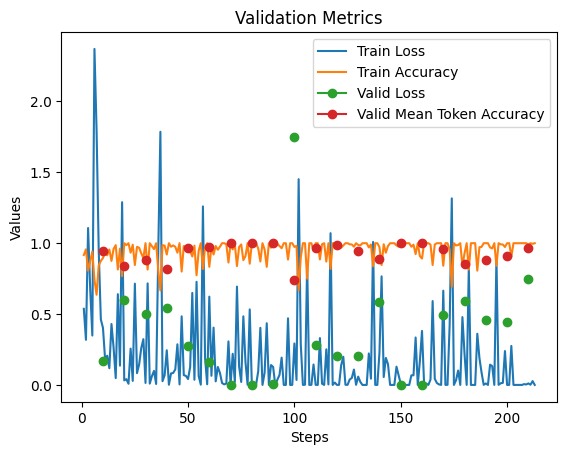

In [132]:
plt.plot(df['step'], df['train_loss'], label='Train Loss')
plt.plot(df['step'], df['train_accuracy'], label='Train Accuracy')
plt.plot(df['step'], df['valid_loss'], marker='o', label='Valid Loss')
plt.plot(df['step'], df['valid_mean_token_accuracy'], marker='o', label='Valid Mean Token Accuracy')

plt.title('Validation Metrics')
plt.xlabel('Steps')
plt.ylabel('Values')
plt.legend()
plt.show()

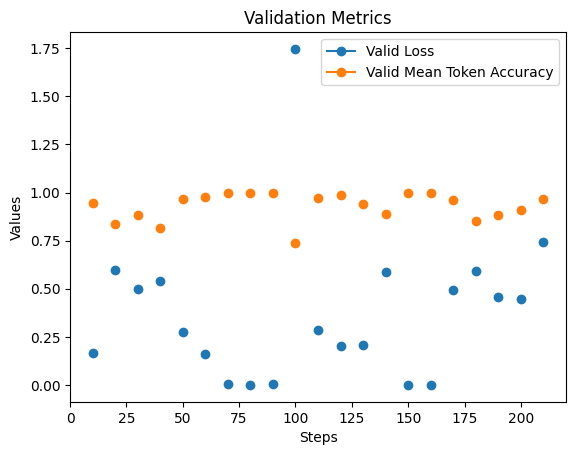

In [134]:
plt.plot(df['step'], df['valid_loss'], marker='o', label='Valid Loss')
plt.plot(df['step'], df['valid_mean_token_accuracy'], marker='o', label='Valid Mean Token Accuracy')

plt.title('Validation Metrics')
plt.xlabel('Steps')
plt.ylabel('Values')
plt.legend()
plt.show()

In [133]:
import requests

url = "https://api.openai.com/v1/fine_tuning/jobs/ftjob-rR761gQU1j8B48D8DFSfAH4b/checkpoints"

headers = {
    "Authorization": f"Bearer {openai.api_key}"
}

r2 = requests.get(url, headers=headers)

# print status code
print(r2.status_code)

# print response data
print(r2.json())

200
{'object': 'list', 'data': [{'object': 'fine_tuning.job.checkpoint', 'id': 'ftckpt_ox3xf3UzatBCT1q1owSPmNzl', 'created_at': 1717083506, 'fine_tuned_model_checkpoint': 'ft:gpt-3.5-turbo-0125:personal:70-30-w-valid:9Uc9HilT', 'fine_tuning_job_id': 'ftjob-rR761gQU1j8B48D8DFSfAH4b', 'metrics': {'step': 213, 'train_loss': 3.179467239533551e-05, 'train_mean_token_accuracy': 1.0}, 'step_number': 213}, {'object': 'fine_tuning.job.checkpoint', 'id': 'ftckpt_Envs784gjUH3xtFTvU6Ol7v6', 'created_at': 1717083390, 'fine_tuned_model_checkpoint': 'ft:gpt-3.5-turbo-0125:personal:70-30-w-valid:9Uc9H9EH:ckpt-step-142', 'fine_tuning_job_id': 'ftjob-rR761gQU1j8B48D8DFSfAH4b', 'metrics': {'step': 142, 'train_loss': 0.055528752505779266, 'train_mean_token_accuracy': 0.9927007555961609}, 'step_number': 142}, {'object': 'fine_tuning.job.checkpoint', 'id': 'ftckpt_nFzu0Iy9YAltxqbOj3vgpToQ', 'created_at': 1717083277, 'fine_tuned_model_checkpoint': 'ft:gpt-3.5-turbo-0125:personal:70-30-w-valid:9Uc9GV74:ckpt-s

## Consumtion of FT-Modell